In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [24]:
df = pd.read_csv('titanic_toy.csv')

In [25]:
df.head(4)

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1


In [26]:
# Train Test Split

X = df.drop(columns=['Survived'])
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [27]:
X_train['Age_99'] = X_train['Age'].fillna(99)
X_train['Age_-1'] = X_train['Age'].fillna(-1)

X_train['Fare_99'] = X_train['Fare'].fillna(99)
X_train['Fare_-1'] = X_train['Fare'].fillna(-1)



In [28]:
X_train.sample(5)

,Age,Fare,Family,Age_99,Age_-1,Fare_99,Fare_-1
826,NaN,56.4958,0,99.0,-1.0,56.4958,56.4958
748,19.0,53.1000,1,19.0,19.0,53.1000,53.1000
61,38.0,80.0000,0,38.0,38.0,80.0000,80.0000
429,32.0,NaN,0,32.0,32.0,99.0000,-1.0000
593,NaN,7.7500,2,99.0,-1.0,7.7500,7.7500


In [29]:
print('Orignal Age variable variance:', X_train['Age'].var())
print('Age Variance after 99 wala imputations : ', X_train['Age_99'].var())
print('Age variance after -1 wala imputation : ', X_train['Age_-1'].var())

print('Orignal Fare variable variance : ', X_train['Fare'].var())
print('Fare Variance after 99 wla imputations : ', X_train['Fare_99'].var())
print('Fare variance after -1 wala imputation : ', X_train['Fare_-1'].var())


Orignal Age variable variance: 204.3495133904614
Age Variance after 99 wala imputations :  951.7275570187172
Age variance after -1 wala imputation :  318.0896202624484
Orignal Fare variable variance :  2448.197913706318
Fare Variance after 99 wla imputations :  2536.0773428319685
Fare variance after -1 wala imputation :  2378.5676784883503


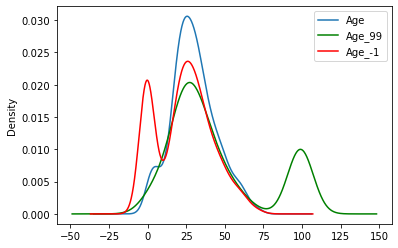

In [30]:
# Ploting the distribution of data

fig = plt.figure()
ax = fig.add_subplot(111)

# orignal variable distribution
X_train['Age'].plot(kind = 'kde', ax=ax)

# variable imputed with the median
X_train['Age_99'].plot(kind = 'kde', ax=ax, color = 'green')

# variable imputed with the mean
X_train['Age_-1'].plot(kind = 'kde', ax=ax, color = 'red')

# add legends 

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc = 'best')

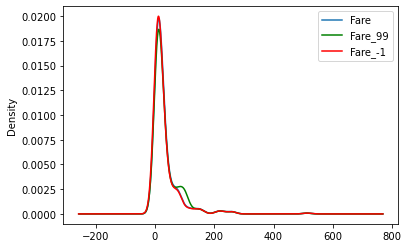

In [31]:
# Ploting the distribution of data

fig = plt.figure()
ax = fig.add_subplot(111)

# orignal variable distribution
X_train['Fare'].plot(kind = 'kde', ax=ax)

# variable imputed with the median
X_train['Fare_99'].plot(kind = 'kde', ax=ax, color = 'green')

# variable imputed with the mean
X_train['Fare_-1'].plot(kind = 'kde', ax=ax, color = 'red')

# add legends 

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc = 'best')

In [32]:
X_train.cov()

,Age,Fare,Family,Age_99,Age_-1,Fare_99,Fare_-1
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,73.268412,63.321188
Fare,70.719262,2448.197914,17.258917,-101.671097,125.558364,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-7.387287,-4.149246,16.051452,16.553989
Age_99,204.349513,-101.671097,-7.387287,951.727557,-189.535540,-100.878826,-94.317400
Age_-1,204.349513,125.558364,-4.149246,-189.535540,318.089620,128.692715,114.394141
Fare_99,73.268412,2448.197914,16.051452,-100.878826,128.692715,2536.077343,2216.958409
Fare_-1,63.321188,2448.197914,16.553989,-94.317400,114.394141,2216.958409,2378.567678


In [33]:
X_train.corr()

,Age,Fare,Family,Age_99,Age_-1,Fare_99,Fare_-1
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.095527,0.084585
Fare,0.092644,1.000000,0.208268,-0.066273,0.142022,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.144787,-0.140668,0.192723,0.205233
Age_99,1.000000,-0.066273,-0.144787,1.000000,-0.344476,-0.064933,-0.062687
Age_-1,1.000000,0.142022,-0.140668,-0.344476,1.000000,0.143284,0.131514
Fare_99,0.095527,1.000000,0.192723,-0.064933,0.143284,1.000000,0.902648
Fare_-1,0.084585,1.000000,0.205233,-0.062687,0.131514,0.902648,1.000000


<AxesSubplot:>

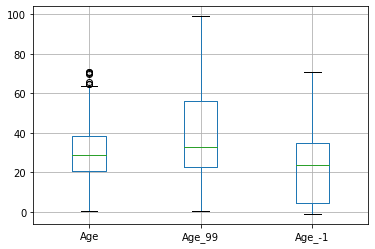

In [34]:
X_train[['Age', 'Age_99', 'Age_-1']].boxplot()


<AxesSubplot:>

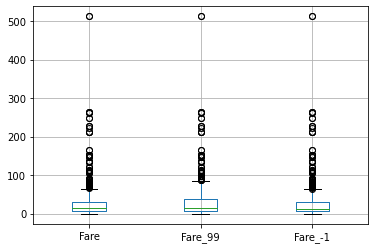

In [35]:
X_train[['Fare', 'Fare_99', 'Fare_-1']].boxplot()


In [41]:
# Train Test Split

X = df.drop(columns=['Survived'])
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [42]:
imputer1 = SimpleImputer(strategy='constant', fill_value=99)
imputer2 = SimpleImputer(strategy='constant', fill_value=-1)

In [37]:
trf = ColumnTransformer([
    ('imputer1', imputer1, ['Age']),
    ('imputer2', imputer2, ['Fare'])
], remainder='passthrough')

In [43]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Age']),
                                ('imputer2',
                                 SimpleImputer(fill_value=-1,
                                               strategy='constant'),
                                 ['Fare'])])

In [44]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [45]:
X_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 99.    , 221.7792,   0.    ],
       [ 99.    ,  25.925 ,   0.    ]])